<a href="https://colab.research.google.com/github/tmtakashi/RNN_practice/blob/master/keras_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def sin(x, T=100):
  return np.sin(2.0 * np.pi * x / T)

# Add noise to sine wave
def toy_problem(T=100, ampl=0.05):
  x = np.arange(0, 2 * T + 1)
  noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
  return sin(x) + noise

f = toy_problem()

In [0]:
def make_dataset(raw_data, n_prev=100):
  
  data, target = [], []
  maxlen = 25
  
  for i in range(len(raw_data)-maxlen):
    data.append(raw_data[i:i + maxlen])
    target.append(raw_data[i+maxlen])
    
  re_data = np.array(data).reshape(len(data), maxlen, 1)
  re_target = np.array(target).reshape(len(data), 1)
    
  return re_data, re_target

g, h = make_dataset(f)

In [0]:
g.shape

(176, 25, 1)

In [0]:
# Build model

# Step number in a training data
length_of_sequence = g.shape[1]
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer  = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=['accuracy'])

model.fit(g, h,
         batch_size=32,
         epochs=100,
         validation_split=0.1)

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 2s 14ms/step - loss: 0.2933 - acc: 0.0000e+00 - val_loss: 0.1730 - val_acc: 0.0000e+00
Epoch 2/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0683 - acc: 0.0000e+00 - val_loss: 0.0131 - val_acc: 0.0000e+00
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0447 - acc: 0.0000e+00 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0164 - acc: 0.0000e+00 - val_loss: 0.0422 - val_acc: 0.0000e+00
Epoch 5/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0136 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 6/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0084 - acc: 0.0000e+00 - val_loss: 0.0044 - val_acc: 0.0000e+00
Epoch 7/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0032 - acc: 0.0000e+00 - val_lo

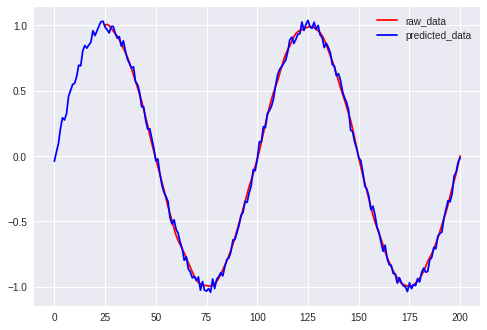

In [0]:
predicted = model.predict(g)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(25, len(predicted) + 25), predicted, color='r', label="raw_data")
plt.plot(range(0, len(f)), f, color='b', label='predicted_data')
plt.legend()
plt.show()

In [0]:
g[175].T

array([[-1.03795589, -1.01803037, -1.01598594, -1.00752035, -0.99012346,
        -0.93469486, -0.93170895, -0.87852602, -0.85085993, -0.87593118,
        -0.81308439, -0.75342271, -0.76969634, -0.70477607, -0.59877154,
        -0.62899393, -0.50688742, -0.52360165, -0.39005065, -0.35497801,
        -0.29572935, -0.22492573, -0.14338109, -0.13372609, -0.0507152 ]])

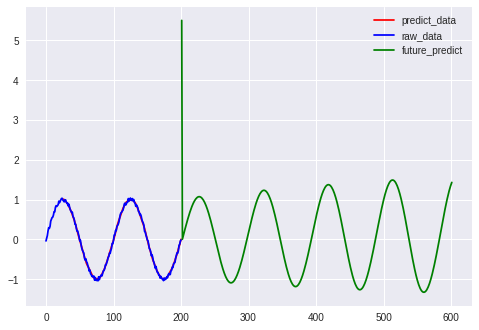

In [0]:
future_test = g[175].T

time_length = future_test.shape[1]

future_result = np.empty((1)) # Append future prediction here

# Predict future
for step2 in range(400):
  
  test_data = np.reshape(future_test, (1, time_length, 1))
  batch_predict = model.predict(test_data)
  
  future_test = np.delete(future_test, 0)
  future_test = np.append(future_test, batch_predict)
  
  future_result = np.append(future_result, batch_predict)
  
  
plt.figure()
plt.plot(range(25, len(predicted)+25), predicted, color='r', label='predict_data')
plt.plot(range(0, len(f)), f, color='b', label='raw_data')
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color='g', label='future_predict')
plt.legend()
plt.show()
  